# Latihan Praktikum Damin Modul 2
Measuring Data Similarity and Dissimilarity   
        
Nama: Elok Fiola       
NIM : 122450051     
Kelas : RC   

## Metrik pada similary

### 1) Simple Matching Coefficient (SMC)

In [2]:
import numpy as np
from sklearn.metrics import jaccard_score

#Dataset biner
data = np.array([
    [1,0,1,1,0], #objek A
    [1,1,0,1,1] #objek B
])

#Menghitung Simple Matching Coefficient (SMC)
def simple_matching_coefficient(x,y):
  a = np.sum(np.logical_and(x==1, y==1))  #Jumlah atribut di mana kedua objek bernilai 1
  d = np.sum(np.logical_and(x==0, y==0))  #JUmlah atribut di mana kedua objek bernilai 0
  b = np.sum(np.logical_and(x==1, y==0))  #Jumlah atribut di mana x bernilai 1 dan y bernilai 0
  c = np.sum(np.logical_and(x==0, y==1))  #Jumlah atribut di mana x bernilai 0 dan y bernilai 1
  smc = (a+d) / (a+b+c+d) #rumus SMC
  return smc

#Menghitung SMC antara objek A dan objek B
smc_value = simple_matching_coefficient(data[0], data[1])
print(f"Simple Matching Coefficient (SMC) antara objek A dan objek B: {smc_value}")

Simple Matching Coefficient (SMC) antara objek A dan objek B: 0.4


### 2) Cosine Similarity
Mengukur sudut kosinus antara dua vektor.

In [4]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

#Membuat dua vektor
vector_1 = np.array([2,1,0,2,0,1,1,0,0,0])
vector_2 = np.array([2,1,1,2,0,1,0,0,1,0])

#Menghitung cosine similarity
cos_sim = cosine_similarity([vector_1], [vector_2])
print(f'Cosine Similarity: {cos_sim[0][0]}')

Cosine Similarity: 0.8703882797784892


### 3) Jaccard Similarity
Mengukur similarity antara dua set data berdasarkan elemen yang dimiliki keduanya.

In [6]:
import numpy as np
from scipy.spatial import distance

#Membuat dua set data
set_1 = np.array([0,1,1,0,1,1,0,0])
set_2 = np.array([1,1,0,0,1,0,1,1])

#Menghitung Jaccard Distance
jaccard_dist = distance.jaccard(set_1, set_2)
jaccard_sim = 1 - jaccard_dist
print(f'Jaccard Similarity: {jaccard_sim}')

Jaccard Similarity: 0.2857142857142857


## Metrik pada Dissimilarity
Dissimilarity mengukur seberapa jauh atau berbedanya dua objek.
Semakin besar nilai dissimilarity, semakin tidak mirip dua objek tersebut.

### 1) Euclidean Distance
Mengukur jarak lurus antara dua titik pada ruang fitur.

In [11]:
import numpy as np

#Membuat dua vektor
point_1 = np.array([2,3])
point_2 = np.array([6,7])

#Menghitung Euclidean Distance
euclidean_dist = np.linalg.norm(point_1 - point_2)
print(f'Euclidean Distance: {euclidean_dist}')

Euclidean Distance: 5.656854249492381


### 2) Manhattan Distance
Jarak total dari satu titik ke titik lain mengikuti garis lurus
(jarak blok kota).

In [13]:
#Menghitung Manhattan Distance
manhattan_dist = distance.cityblock(point_1, point_2)
print(f'Manhattan Distance: {manhattan_dist}')

Manhattan Distance: 8


## Latihan Praktikum

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.spatial import distance

In [16]:
#menghasilkan 100 baris data untuk 2 fitur/ kolom numerik (angka acak antara 0 dan 10)
np.random.seed(42)
data_numerik = np.random.randint(0, 10, size=(100,2))

In [17]:
#Menghasilkan 100 titik data biner untuk binary feature (0 dan 1)
data_biner = np.random.randint(0,2, size=(100, 1))

In [18]:
#Gabungkan data numerik dan biner menjadi satu set data
data = np.hstack((data_numerik, data_biner))
df = pd.DataFrame(data, columns=['Feature_1', 'Features_2', 'Binary_Feature'])

In [19]:
#Tampilkan 5 baris pertama dari kumpulan data
print("Dataset with 100 data points:")
print(df.head)

Dataset with 100 data points:
<bound method NDFrame.head of     Feature_1  Features_2  Binary_Feature
0           6           3               1
1           7           4               0
2           6           9               0
3           2           6               1
4           7           4               1
..        ...         ...             ...
95          3           6               1
96          7           0               1
97          5           7               1
98          4           3               0
99          1           5               1

[100 rows x 3 columns]>


In [22]:
#1. Perhitungan Jarak Euclidean
euclidean_matrix = euclidean_distances(data_numerik)
print("\nEuclidean Distance Matrix (first 5 row):\n", euclidean_matrix[:5, :5])


Euclidean Distance Matrix (first 5 row):
 [[0.         1.41421356 6.         5.         1.41421356]
 [1.41421356 0.         5.09901951 5.38516481 0.        ]
 [6.         5.09901951 0.         5.         5.09901951]
 [5.         5.38516481 5.         0.         5.38516481]
 [1.41421356 0.         5.09901951 5.38516481 0.        ]]


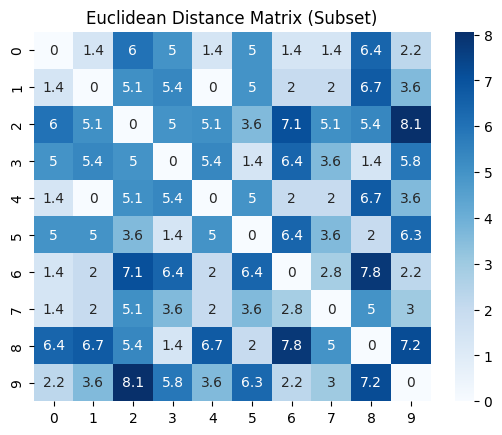

In [24]:
#Visualisasi Matriks Jarak Euclidean menggunakan heatmap
sns.heatmap(euclidean_matrix[:10, :10], annot=True, cmap="Blues")
plt.title("Euclidean Distance Matrix (Subset)")
plt.show()

In [25]:
#2. Perhitungan Cosine Similarity
cosine_matrix = cosine_similarity(data_numerik)
print("\nCosine Similarity Matrix (first 5 rows):\n", cosine_matrix[:5, :5])


Cosine Similarity Matrix (first 5 rows):
 [[1.         0.99846035 0.86824314 0.70710678 0.99846035]
 [0.99846035 1.         0.89442719 0.74524131 1.        ]
 [0.86824314 0.89442719 1.         0.96476382 0.89442719]
 [0.70710678 0.74524131 0.96476382 1.         0.74524131]
 [0.99846035 1.         0.89442719 0.74524131 1.        ]]


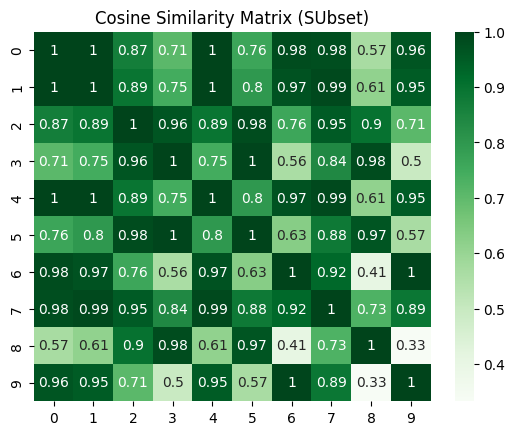

In [27]:
#visualisasi Cosine Similarity Matrix menggunakan heatmap
sns.heatmap(cosine_matrix[:10, :10], annot=True, cmap="Greens")
plt.title("Cosine Similarity Matrix (SUbset)")
plt.show()

In [33]:
# 3. Perhitungan Jacard Similarity hanya menggunakan Binary Feature

import numpy as np
from scipy.spatial import distance

jaccard_matrix = np.zeros((len(data_biner), len(data_biner)))
for i in range(len(data_biner)):
  for j in range(len(data_biner)):
    jaccard_matrix[i, j] = 1 - distance.jaccard(data_biner[i], data_biner[j])
print("\nJacard Similarity Matrix (fisrt 5 row):\n", jaccard_matrix)


Jacard Similarity Matrix (fisrt 5 row):
 [[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]]


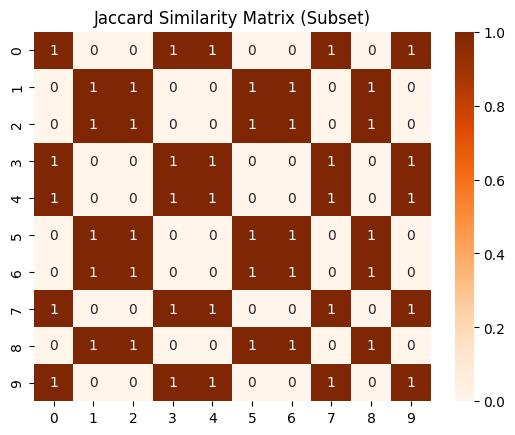

In [35]:
#Visualisasi Jacard SImilarity Matrix menggunakan heatmap
sns.heatmap(jaccard_matrix[:10, :10], annot=True, cmap="Oranges")
plt.title("Jaccard Similarity Matrix (Subset)")
plt.show()